CS 513 A- Project
Submission to - Prof. Khashayar Dehnad
Project by - Chetan Goyal (20005334), Muzaffarhusain Turak, Praveen Jakhar, Vishal Mandala

In [201]:
import numpy as np
import pandas as pd

#reading dataset into dataframe
df = pd.read_csv("weatherAUS.csv")

#seeing how our dataset looks like using first five rows
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Seeing the dimension of our data

In [202]:
#(rows, columns)
print('(rows, columns) ->', df.shape)
print('\n')
#to check datatypes of columns
df.info()

(rows, columns) -> (145460, 23)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
Date             145460 non-null object
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
Evaporation      82670 non-null float64
Sunshine         75625 non-null float64
WindGustDir      135134 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       134894 non-null object
WindDir3pm       141232 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Cloud9am         89572 non-null float64
Cloud3pm         86102 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
Rai

In [203]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Here using describe, info and head- we notice that the columns with datatype float64 are numerical whereas the one with object datatype are categorical
Let's check the unique values in the categorical category which are seven - Date, Location, WindGustDir, WindDir9am, WindDir3pm, RainToday, RainTomorrow

In [204]:
for column in df:
    if df[column].dtype == 'object':
        print('Unique values in ' + column + ' are->', len(df[column].unique()))

Unique values in Date are-> 3436
Unique values in Location are-> 49
Unique values in WindGustDir are-> 17
Unique values in WindDir9am are-> 17
Unique values in WindDir3pm are-> 17
Unique values in RainToday are-> 3
Unique values in RainTomorrow are-> 3


Of all the above, we see that the unique values in date have huge number - 3436 which is high cardinality and hence it will result in poor performance of our algorithm
To reduce the cardinality, lets just keep the month part in account and drop date and year

In [205]:
#Converting date to datetime and extracting month out of it
#Adding the month to our dataset
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day'] = pd.to_datetime(df['Date']).dt.day
df['Month'] = df['Month'].astype(object) #so that all categorical values stay as object datatype
df['Day'] = df['Day'].astype(object)
df.drop('Date',inplace= True,axis=1) #removing date now and using month instead
df['Month'].unique()

array([12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype=object)

In [206]:
#checking if null values are present in rows
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Month                0
Day                  0
dtype: int64

In [207]:
#Removing all rows that have null values in Rain Tomorrow which is our target column
df.dropna(axis=0, how='any', subset=('RainTomorrow',), inplace=True)
df.isnull().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
Month                0
Day                  0
dtype: int64

In [208]:
#Dropping columns with more than 50% rows containing null values
df.dropna(axis=1, thresh=df.shape[0]*.5, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 24 columns):
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null object
RainTomorrow     142193 non-null obje

In [209]:
#Replacing null values in numerical columns with their mean
for column in df:
    if df[column].dtype == 'float64':
        df[column].fillna(value = df[column].mean(), inplace = True)
df.isnull().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       9330
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         1406
RainTomorrow         0
Month                0
Day                  0
dtype: int64

In [210]:
#Replacing null values in categorical columns with their mode
for column in df:
    if df[column].dtype == 'object':
        df[column].fillna(value = df[column].mode()[0], inplace = True)
df.isnull().sum()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [211]:
#Checking the binary distribution over our RainTomorrow target
print(df['RainTomorrow'].value_counts())
df.shape

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64


(142193, 24)

In [212]:
#Using label encoder to label all categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day
0,2,13.4,22.9,0.6,5.469824,7.624853,13,44.0,13,14,...,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0,0,12,1
1,2,7.4,25.1,0.0,5.469824,7.624853,14,44.0,6,15,...,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0,0,12,2
2,2,12.9,25.7,0.0,5.469824,7.624853,15,46.0,13,15,...,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0,0,12,3
3,2,9.2,28.0,0.0,5.469824,7.624853,4,24.0,9,0,...,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0,0,12,4
4,2,17.5,32.3,1.0,5.469824,7.624853,13,41.0,1,7,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,12,5


Plotting of our dataset

In [ ]:
import matplotlib.pyplot as plt

df.plot(figsize=(20, 10))

Performing normalization on columns Pressure9am and Pressure3pm as they are highly variant

In [229]:
import scipy.stats as stats
df['Pressure9am'] = stats.zscore(df['Pressure9am'])
df['Pressure3pm'] = stats.zscore(df['Pressure3pm'])
df['Pressure9am'] *= 10
df['Pressure3pm'] *= 10
min(df['Pressure9am'])

-55.07340861155657

Rechecking using plot again

In [ ]:
df.plot(figsize=(20, 10))

Correlation matrix using heatmap

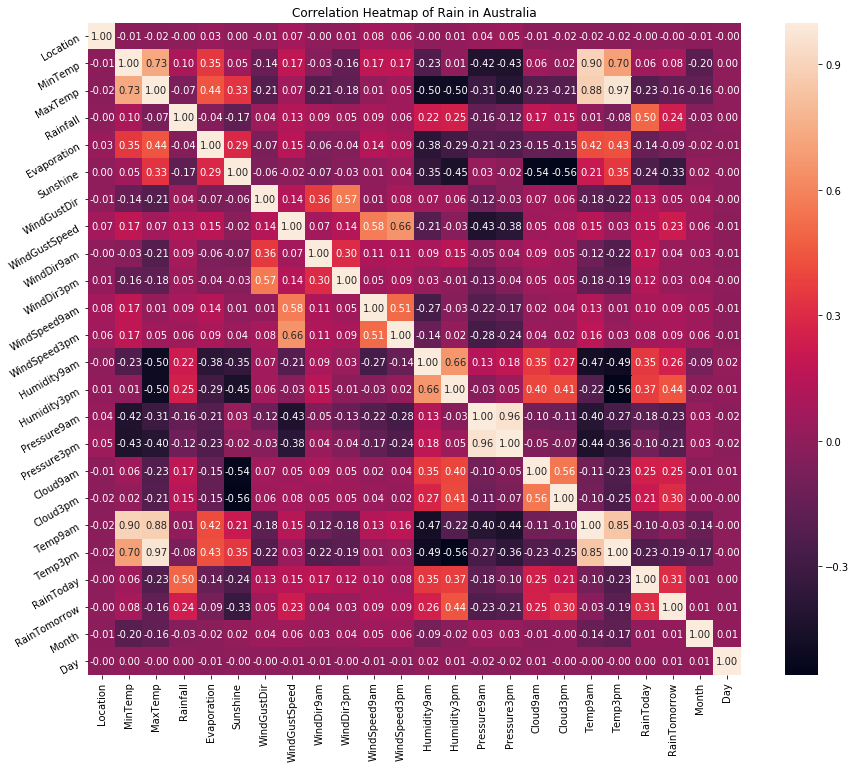

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation = df.corr()
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

Experiments after studying the heatmap

In [215]:
#df.drop('Sunshine',inplace= True,axis=1)
#df.drop('Pressure9am',inplace= True,axis=1)
#df.drop('Pressure3pm',inplace= True,axis=1) 
df.drop('Temp3pm',inplace= True,axis=1) #dropping this column as it has a correlation of 0.97 with Maxtemp3pm and its removal results in improvement of accuracy
#df.drop('Temp9am',inplace= True,axis=1)
#df.drop('Location',inplace= True,axis=1)




# TODO - Outliers

In [216]:
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,RainToday,RainTomorrow,Month,Day
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,...,142193.000000,1.421930e+05,1.421930e+05,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,23.740655,12.186400,23.226784,2.349974,5.469824,7.624853,8.059039,39.984292,7.000316,7.788485,...,51.482606,-2.861912e-13,1.685085e-13,4.437189,4.503167,16.987509,0.221213,0.224181,6.402544,15.715084
std,14.237503,6.388924,7.109554,8.423217,3.168114,2.734927,4.694267,13.138385,4.514678,4.546322,...,20.532065,1.000004e+01,1.000004e+01,2.278080,2.104709,6.472166,0.415065,0.417043,3.426506,8.798150
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,...,0.000000,-5.507341e+01,-5.710798e+01,0.000000,0.000000,-7.200000,0.000000,0.000000,1.000000,1.000000
25%,11.000000,7.600000,17.900000,0.000000,4.000000,7.624853,4.000000,31.000000,3.000000,4.000000,...,37.000000,-6.157160e+00,-6.372873e+00,3.000000,4.000000,12.300000,0.000000,0.000000,3.000000,8.000000
50%,24.000000,12.000000,22.700000,0.000000,5.469824,7.624853,9.000000,39.000000,7.000000,8.000000,...,51.482606,1.718896e-11,2.245913e-11,4.437189,4.503167,16.800000,0.000000,0.000000,6.000000,16.000000
75%,36.000000,16.800000,28.200000,0.800000,5.469824,8.700000,13.000000,46.000000,11.000000,12.000000,...,65.000000,6.146018e+00,6.198657e+00,6.000000,6.000000,21.500000,0.000000,0.000000,9.000000,23.000000
max,48.000000,33.900000,48.100000,371.000000,145.000000,14.500000,15.000000,135.000000,15.000000,15.000000,...,100.000000,3.460638e+01,3.643019e+01,9.000000,9.000000,40.200000,1.000000,1.000000,12.000000,31.000000


Data Preprocessing is complete
We now divide into train and test dataset

In [217]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X = df.drop(['RainTomorrow'], axis=1)
y = df[['RainTomorrow']]
#print(y.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)
X_train.shape, X_test.shape


((99535, 22), (42658, 22))

K-Nearest Neighbours using K = 3

In [218]:
from sklearn.neighbors import KNeighborsClassifier
#creating our knn classifier model with n = 3
knn_value_3 = KNeighborsClassifier(n_neighbors = 3)
knn_value_3.fit(X_train, np.ravel(y_train,order='C'))

#Estimating the accuracy of knn classifier with 3 knn
print("Accuracy score ->", knn_value_3.score(X_test, y_test))

#creating confusion matrix
y_pred = knn_value_3.predict(X_test)
cm=confusion_matrix(y_test, y_pred)

print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Accuracy score -> 0.829504430587463
Confusion matrix
 [[30454  2582]
 [ 4691  4931]]
True Positives(TP) =  30454
True Negatives(TN) =  4931
False Positives(FP) =  2582
False Negatives(FN) =  4691


K-Nearest Neighbours using K = 5

In [219]:
#creating our knn classifier model with n = 5
knn_value_5 = KNeighborsClassifier(n_neighbors = 5)
knn_value_5.fit(X_train, np.ravel(y_train,order='C'))


#Estimating the accuracy of knn classifier with 5 knn
print("Accuracy score ->", knn_value_5.score(X_test, y_test))

#creating confusion matrix
y_pred = knn_value_5.predict(X_test)
cm=confusion_matrix(y_test, y_pred)

print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Accuracy score -> 0.8380374138496882
Confusion matrix
 [[30928  2108]
 [ 4801  4821]]
True Positives(TP) =  30928
True Negatives(TN) =  4821
False Positives(FP) =  2108
False Negatives(FN) =  4801


K-Nearest Neighbours using K = 10

In [220]:
#creating our knn classifier model with n = 10
knn_value_10 = KNeighborsClassifier(n_neighbors = 10)
knn_value_10.fit(X_train, np.ravel(y_train,order='C'))

#Estimating the accuracy of knn classifier with 10 knn
print("Accuracy score ->", knn_value_10.score(X_test, y_test))

#creating confusion matrix
y_pred = knn_value_10.predict(X_test)

cm=confusion_matrix(y_test, y_pred)

print('Confusion matrix:-', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Accuracy score -> 0.8428430775001172
Confusion matrix:- [[31759  1277]
 [ 5427  4195]]
True Positives(TP) =  31759
True Negatives(TN) =  4195
False Positives(FP) =  1277
False Negatives(FN) =  5427


Gaussian Naive Bayes

In [221]:
from sklearn.naive_bayes import GaussianNB
#creating our Gaussian naive bayes classifier
clf_nb = GaussianNB().fit(X_train, np.ravel(y_train,order='C'))

#Estimating the accuracy of knn classifier with 3 knn
print("Accuracy score ->", clf_nb.score(X_test, y_test))

#creating confusion matrix
y_pred = clf_nb.predict(X_test)
cm=confusion_matrix(y_test, y_pred)

print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Accuracy score -> 0.8066013408973698
Confusion matrix
 [[28671  4365]
 [ 3885  5737]]
True Positives(TP) =  28671
True Negatives(TN) =  5737
False Positives(FP) =  4365
False Negatives(FN) =  3885


Decision Trees (CART)

In [222]:
from sklearn.tree import DecisionTreeClassifier
#creating our Decision Tree Classifier - CART classifier is what is packaged into sklearn
clf_dt = DecisionTreeClassifier().fit(X_train, np.ravel(y_train,order='C'))

#Estimating the accuracy
print("Accuracy score ->", clf_dt.score(X_test, y_test))

#creating confusion matrix
y_pred = clf_dt.predict(X_test)
cm=confusion_matrix(y_test, y_pred)

print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Accuracy score -> 0.7836044821604389
Confusion matrix
 [[28245  4791]
 [ 4440  5182]]
True Positives(TP) =  28245
True Negatives(TN) =  5182
False Positives(FP) =  4791
False Negatives(FN) =  4440


Random Forest(Medium Variance)

In [223]:
from sklearn.ensemble import RandomForestClassifier
#creating a classifier using Random Forest
clf_RF = RandomForestClassifier().fit(X_train, np.ravel(y_train,order='C'))

#Estimating the accuracy
print("Accuracy score ->", clf_RF.score(X_test, y_test))

#creating confusion matrix
y_pred = clf_RF.predict(X_test)
cm=confusion_matrix(y_test, y_pred)

print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Accuracy score -> 0.8448825542688359
Confusion matrix
 [[31527  1509]
 [ 5108  4514]]
True Positives(TP) =  31527
True Negatives(TN) =  4514
False Positives(FP) =  1509
False Negatives(FN) =  5108


Extra Trees (Low Variance)

In [224]:
from sklearn.ensemble import ExtraTreesClassifier
#creating a classifier using Extra Forest
clf_ext = ExtraTreesClassifier().fit(X_train, np.ravel(y_train,order='C'))

#Estimating the accuracy
print("Accuracy score ->", clf_ext.score(X_test, y_test))

#creating confusion matrix
y_pred = clf_ext.predict(X_test)
cm=confusion_matrix(y_test, y_pred)

print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Accuracy score -> 0.8420225983402879
Confusion matrix
 [[31560  1476]
 [ 5263  4359]]
True Positives(TP) =  31560
True Negatives(TN) =  4359
False Positives(FP) =  1476
False Negatives(FN) =  5263


Artificial Neural Network

In [225]:
from sklearn.neural_network import MLPClassifier
#creating a classifier using MLP
clf_mlp = MLPClassifier().fit(X_train, np.ravel(y_train,order='C'))

#Estimating the accuracy
print("Accuracy score ->", clf_mlp.score(X_test, y_test))

#creating confusion matrix
y_pred = clf_mlp.predict(X_test)
cm=confusion_matrix(y_test, y_pred)

print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Accuracy score -> 0.8491959304233673
Confusion matrix
 [[30623  2413]
 [ 4020  5602]]
True Positives(TP) =  30623
True Negatives(TN) =  5602
False Positives(FP) =  2413
False Negatives(FN) =  4020


Adaboost

In [226]:
from sklearn.ensemble import AdaBoostClassifier
#creating a classifier using MLP
clf_ada = AdaBoostClassifier(n_estimators=100, learning_rate=1.1).fit(X_train, np.ravel(y_train,order='C'))

#Estimating the accuracy
print("Accuracy score ->", clf_ada.score(X_test, y_test))

#creating confusion matrix
y_pred = clf_ada.predict(X_test)
cm=confusion_matrix(y_test, y_pred)

print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Accuracy score -> 0.8479066060293498
Confusion matrix
 [[31294  1742]
 [ 4746  4876]]
True Positives(TP) =  31294
True Negatives(TN) =  4876
False Positives(FP) =  1742
False Negatives(FN) =  4746


Support Vector Machines

In [227]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf_svm = make_pipeline(StandardScaler(), SVC()).fit(X_train, np.ravel(y_train,order='C'))

print("Accuracy score ->", clf_svm.score(X_test, y_test))

#creating confusion matrix
y_pred = clf_svm.predict(X_test)
cm=confusion_matrix(y_test, y_pred)

print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Accuracy score -> 0.8547751887102067
Confusion matrix
 [[31820  1216]
 [ 4979  4643]]
True Positives(TP) =  31820
True Negatives(TN) =  4643
False Positives(FP) =  1216
False Negatives(FN) =  4979
